In [1]:
import numpy as np
import xarray as xr

In [2]:
# load stage test data
hist_pr=xr.open_dataset('/glade/work/fangwang/ERA5-single-daily/pr_1959-2014_daily_invert.nc',
                       engine='netcdf4', decode_times=False)
pr_hist=hist_pr.tp[7305:,5:43,19:61]
time_hist=hist_pr.time[7305:]

In [13]:
time_hist

array([ 692507,  692531,  692555, ..., 1008011, 1008035, 1008059],
      dtype=int32)

In [127]:
pr_hist

<xarray.DataArray 'tp' (time: 13149, latitude: 38, longitude: 42)>
[20985804 values with dtype=float64]
Coordinates:
  * time       (time) int32 692507 692531 692555 ... 1008011 1008035 1008059
  * longitude  (longitude) float32 -94.5 -94.25 -94.0 ... -84.75 -84.5 -84.25
  * latitude   (latitude) float32 26.0 26.25 26.5 26.75 ... 34.75 35.0 35.25
Attributes:
    long_name:     Total precipitation
    units:         m
    cell_methods:  time: sum

In [128]:
date_hist

DatetimeIndex(['1979-01-01 11:00:00', '1979-01-02 11:00:00',
               '1979-01-03 11:00:00', '1979-01-04 11:00:00',
               '1979-01-05 11:00:00', '1979-01-06 11:00:00',
               '1979-01-07 11:00:00', '1979-01-08 11:00:00',
               '1979-01-09 11:00:00', '1979-01-10 11:00:00',
               ...
               '2014-12-22 11:00:00', '2014-12-23 11:00:00',
               '2014-12-24 11:00:00', '2014-12-25 11:00:00',
               '2014-12-26 11:00:00', '2014-12-27 11:00:00',
               '2014-12-28 11:00:00', '2014-12-29 11:00:00',
               '2014-12-30 11:00:00', '2014-12-31 11:00:00'],
              dtype='datetime64[ns]', length=13149, freq=None)

In [129]:
pr_hist_array=xr.DataArray(pr_hist.data, coords={'time': pr_hist.time, 'latitude': pr_hist.latitude,'longitude': pr_hist.longitude}, dims=["time", "latitude", "longitude"])
pr_hist_date=pr_hist_array.assign_coords(time=date_hist)
pr_hist_yearly=pr_hist_date.resample(time='Y', closed='right').sum(dim='time')
pr_hist_yearly_area_mean=np.mean(pr_hist_yearly.values, axis=(1,2))*1000

In [130]:
pr_hist_yearly_area_mean

array([1447.19061405, 1237.34005634, 1009.35652238, 1398.88713282,
       1586.87961456, 1238.17570492, 1385.05660012, 1209.80066858,
       1263.81463661, 1273.87051721, 1353.52347799, 1066.90927446,
       1507.77305815, 1413.22175636, 1294.76577523, 1408.62571694,
       1288.57393689, 1185.28694488, 1350.61516505, 1502.17290661,
        992.50084701,  920.32238599, 1209.46819896, 1453.13475587,
       1276.23525033, 1341.79067881, 1205.77097169,  988.46489258,
        988.04146361, 1207.87786813, 1415.8933243 , 1071.63983473,
        970.94238397, 1183.86715227, 1405.23528563, 1211.32148194])

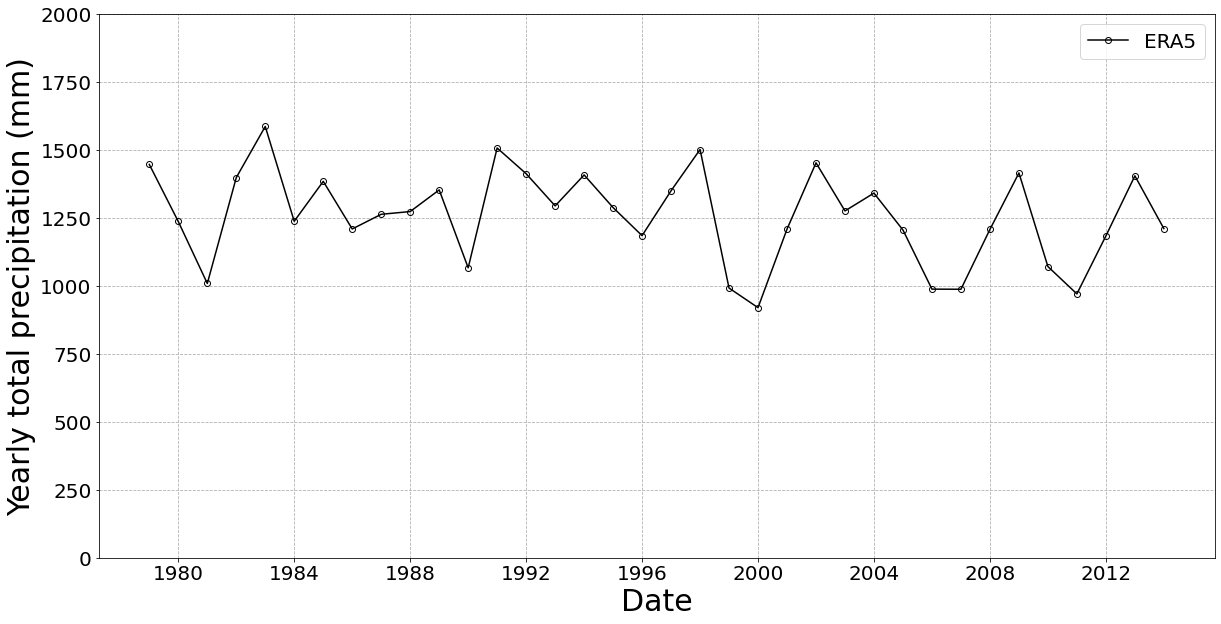

In [131]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
#ax.plot(names, s1_daily_area_mean[1:366], color='grey', marker="o", mfc='none',label="Scenario1 (KGE=0.152)", alpha=0.5)
#ax.plot(names, s2_daily_area_mean[1:366], color='blue', marker="o", mfc='none',label="Scenario2 (KGE=0.891)", alpha=0.5)
#ax.plot(names, s3_daily_area_mean[1:366], color='red',  marker="o",mfc='none',label="Scenario3 (KGE=0.947)", alpha=0.5)
#ax.plot(names, s4_daily_area_mean[1:366], color='purple', marker="o",mfc='none',label="Scenario4 (KGE=0.850)", alpha=0.5)
#ax.plot(names, s5_daily_area_mean[1:366], color='cyan',  marker="o",mfc='none',label="Scenario5 (KGE=0.958)", alpha=0.5)
#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(0, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

In [132]:
# load EC_Earth3 bilinear
Earth3_hist_pr=xr.open_dataset('/glade/work/fangwang/CMIP6_bilinear/EC-Earth3/historical/pr_1959-2014_regrid_0.25.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_hist=Earth3_hist_pr.pr[7305:,5:43,19:61]
Earth3_time_hist=Earth3_hist_pr.time[7305:]

In [134]:
Earth3_pr_hist

<xarray.DataArray 'pr' (time: 13149, lat: 38, lon: 42)>
[20985804 values with dtype=float32]
Coordinates:
  * time     (time) float64 4.712e+04 4.712e+04 ... 6.026e+04 6.026e+04
  * lon      (lon) float64 -94.5 -94.25 -94.0 -93.75 ... -84.75 -84.5 -84.25
  * lat      (lat) float64 26.0 26.25 26.5 26.75 27.0 ... 34.5 34.75 35.0 35.25
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-26T03:14:53Z altered by CMOR: Reordered dimension...
    remap:          remapped via ESMF_regrid_with_weights: Bilinear

In [135]:
Earth3_time_hist

<xarray.DataArray 'time' (time: 13149)>
array([47116.5, 47117.5, 47118.5, ..., 60262.5, 60263.5, 60264.5])
Coordinates:
  * time     (time) float64 4.712e+04 4.712e+04 ... 6.026e+04 6.026e+04
Attributes:
    standard_name:  time
    long_name:      time
    units:          days since 1850-01-01 00:00:00
    calendar:       proleptic_gregorian
    axis:           T

In [136]:
import pandas as pd
Earth3_date_hist=pd.to_datetime(Earth3_time_hist, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))

In [137]:
Earth3_date_hist

DatetimeIndex(['1979-01-01 12:00:00', '1979-01-02 12:00:00',
               '1979-01-03 12:00:00', '1979-01-04 12:00:00',
               '1979-01-05 12:00:00', '1979-01-06 12:00:00',
               '1979-01-07 12:00:00', '1979-01-08 12:00:00',
               '1979-01-09 12:00:00', '1979-01-10 12:00:00',
               ...
               '2014-12-22 12:00:00', '2014-12-23 12:00:00',
               '2014-12-24 12:00:00', '2014-12-25 12:00:00',
               '2014-12-26 12:00:00', '2014-12-27 12:00:00',
               '2014-12-28 12:00:00', '2014-12-29 12:00:00',
               '2014-12-30 12:00:00', '2014-12-31 12:00:00'],
              dtype='datetime64[ns]', length=13149, freq=None)

In [138]:
Earth3_pr_hist_array=xr.DataArray(Earth3_pr_hist.data, coords={'time': Earth3_pr_hist.time, 'lat': Earth3_pr_hist.lat,'lon': Earth3_pr_hist.lon}, dims=["time", "lat", "lon"])
Earth3_pr_hist_date=Earth3_pr_hist_array.assign_coords(time=Earth3_date_hist)
Earth3_pr_hist_yearly=Earth3_pr_hist_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_hist_yearly_area_mean=np.mean(Earth3_pr_hist_yearly.values, axis=(1,2))*86400

In [139]:
Earth3_pr_hist_yearly_area_mean

array([1383.47219825, 1345.75387537, 1509.48640108, 1420.41345835,
       1579.27190065, 1387.18121052, 1390.73540568, 1404.39664721,
       1639.79718089, 1411.38047576, 1311.62137091, 1646.7942059 ,
       1632.71808028, 1427.70144939, 1615.59968591, 1499.0103364 ,
       1328.53682935, 1575.68680644, 1469.04453635, 1422.5887835 ,
       1362.08329797, 1546.02951407, 1446.8783319 , 1111.99300289,
       1354.38686013, 1499.68850613, 1429.63972092, 1378.68397236,
       1592.45678186, 1428.30752134, 1425.35489202, 1258.47074389,
       1209.99842584, 1425.32544136, 1454.10001874, 1427.5318265 ])

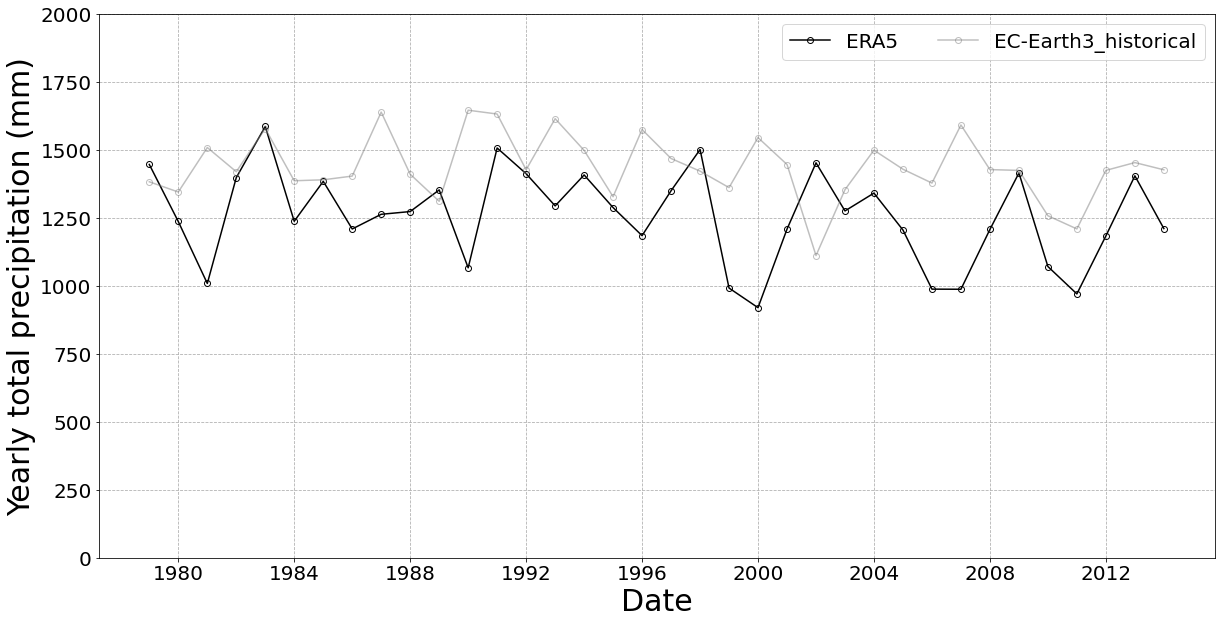

In [140]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names, Earth3_pr_hist_yearly_area_mean, color='grey', marker="o", mfc='none',label="EC-Earth3_historical", alpha=0.5)
#ax.plot(names, s2_daily_area_mean[1:366], color='blue', marker="o", mfc='none',label="Scenario2 (KGE=0.891)", alpha=0.5)
#ax.plot(names, s3_daily_area_mean[1:366], color='red',  marker="o",mfc='none',label="Scenario3 (KGE=0.947)", alpha=0.5)
#ax.plot(names, s4_daily_area_mean[1:366], color='purple', marker="o",mfc='none',label="Scenario4 (KGE=0.850)", alpha=0.5)
#ax.plot(names, s5_daily_area_mean[1:366], color='cyan',  marker="o",mfc='none',label="Scenario5 (KGE=0.958)", alpha=0.5)
#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(0, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

In [141]:
# load EC_Earth3 bilinear
Earth3_ssp126_pr=xr.open_dataset('/glade/work/fangwang/QDM/EC-Earth3/ssp126/pr/pr_QDM_2015-2100.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp126=Earth3_ssp126_pr.pr
Earth3_time_ssp126=Earth3_ssp126_pr.time

In [142]:
Earth3_ssp126_pr

<xarray.Dataset>
Dimensions:  (lat: 38, lon: 42, time: 31411)
Coordinates:
  * time     (time) float64 6.027e+04 6.027e+04 ... 9.167e+04 9.168e+04
  * lon      (lon) float64 -94.5 -94.25 -94.0 -93.75 ... -84.75 -84.5 -84.25
  * lat      (lat) float64 26.0 26.25 26.5 26.75 27.0 ... 34.5 34.75 35.0 35.25
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    title:        EC-Earth3 QDM bias corrected results with 0.25X0.25 spatial...
    Calendar:     gregorian
    history:      Tue Sep 06 01:18:24 2022: cdo mergetime pr_QDM_2015-2024.nc...
    CDO:          Climate Data Operators version 2.0.1 (https://mpimet.mpg.de...

In [143]:
import pandas as pd
Earth3_date_ssp126=pd.to_datetime(Earth3_time_ssp126, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))

In [144]:
Earth3_date_ssp126

DatetimeIndex(['2015-01-01 12:00:00', '2015-01-02 12:00:00',
               '2015-01-03 12:00:00', '2015-01-04 12:00:00',
               '2015-01-05 12:00:00', '2015-01-06 12:00:00',
               '2015-01-07 12:00:00', '2015-01-08 12:00:00',
               '2015-01-09 12:00:00', '2015-01-10 12:00:00',
               ...
               '2100-12-22 12:00:00', '2100-12-23 12:00:00',
               '2100-12-24 12:00:00', '2100-12-25 12:00:00',
               '2100-12-26 12:00:00', '2100-12-27 12:00:00',
               '2100-12-28 12:00:00', '2100-12-29 12:00:00',
               '2100-12-30 12:00:00', '2100-12-31 12:00:00'],
              dtype='datetime64[ns]', length=31411, freq=None)

In [145]:
Earth3_pr_ssp126_array=xr.DataArray(Earth3_pr_ssp126.data, coords={'time': Earth3_pr_ssp126.time, 'lat': Earth3_pr_ssp126.lat,'lon': Earth3_pr_ssp126.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp126_date=Earth3_pr_ssp126_array.assign_coords(time=Earth3_date_ssp126)
Earth3_pr_ssp126_yearly=Earth3_pr_ssp126_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp126_yearly_area_mean=np.mean(Earth3_pr_ssp126_yearly.values, axis=(1,2))

In [146]:
Earth3_pr_ssp126_yearly_area_mean

array([1383.8877 , 1402.8652 , 1228.7399 , 1231.0187 , 1149.2626 ,
       1438.5696 , 1371.6763 , 1146.8269 , 1196.6871 , 1419.2146 ,
       1367.6482 , 1320.9629 , 1179.3995 , 1360.4485 , 1290.0275 ,
       1022.28906, 1239.6249 , 1326.9353 , 1415.9032 , 1196.1417 ,
       1280.1987 , 1227.8755 , 1324.876  , 1237.4828 , 1204.9038 ,
       1447.9094 , 1062.1356 , 1200.7616 , 1530.7058 , 1279.594  ,
       1225.7198 , 1253.3385 , 1387.801  , 1226.6299 , 1325.6548 ,
       1370.6312 , 1383.9541 , 1248.902  , 1392.2224 , 1290.4342 ,
       1245.1045 , 1320.447  , 1371.1235 , 1127.0476 , 1499.2454 ,
       1312.3939 , 1258.0554 , 1399.5924 , 1303.9274 , 1470.4503 ,
       1180.4238 , 1291.0027 , 1374.0298 , 1181.8403 , 1203.1974 ,
       1401.317  , 1506.8328 , 1180.8481 , 1402.2793 , 1365.7587 ,
       1429.6881 , 1162.805  , 1125.1613 , 1223.4652 , 1432.26   ,
       1376.8234 , 1332.3833 , 1218.48   , 1297.6907 , 1053.8202 ,
       1009.2575 , 1358.2872 , 1163.1627 , 1244.3844 , 1280.52

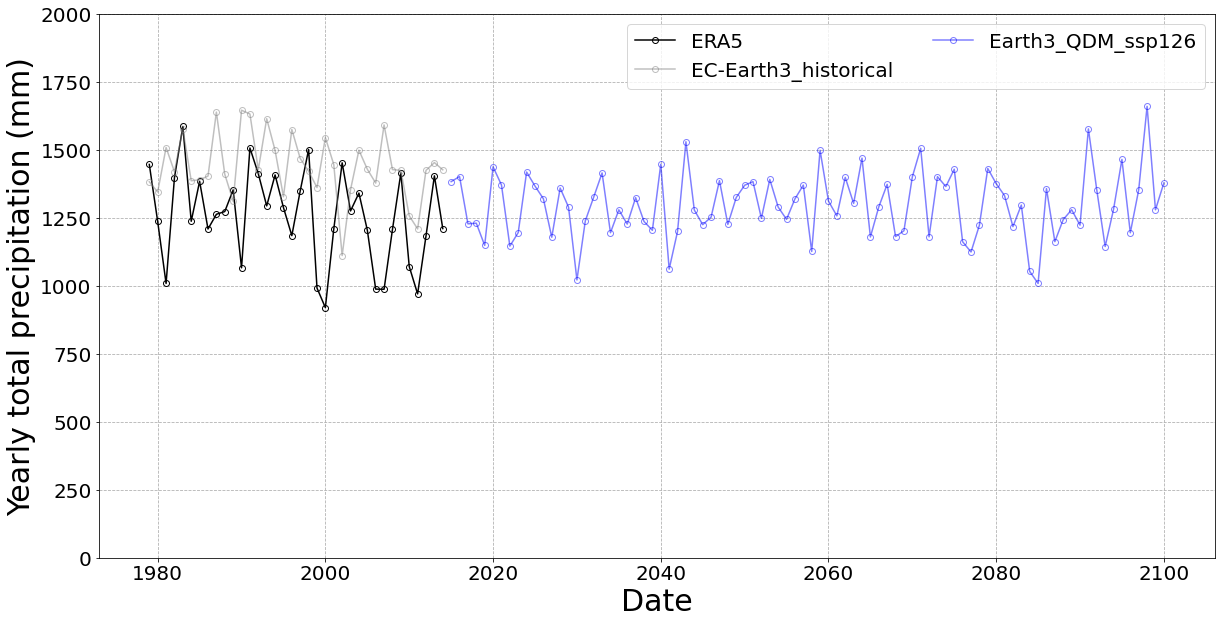

In [147]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names, Earth3_pr_hist_yearly_area_mean, color='grey', marker="o", mfc='none',label="EC-Earth3_historical", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="Earth3_QDM_ssp126", alpha=0.5)
#ax.plot(names, s3_daily_area_mean[1:366], color='red',  marker="o",mfc='none',label="Scenario3 (KGE=0.947)", alpha=0.5)
#ax.plot(names, s4_daily_area_mean[1:366], color='purple', marker="o",mfc='none',label="Scenario4 (KGE=0.850)", alpha=0.5)
#ax.plot(names, s5_daily_area_mean[1:366], color='cyan',  marker="o",mfc='none',label="Scenario5 (KGE=0.958)", alpha=0.5)
#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(0, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

In [148]:
# load EC_Earth3 bilinear
Earth3_ssp585_pr=xr.open_dataset('/glade/work/fangwang/QDM/EC-Earth3/ssp585/pr/pr_QDM_2015-2100.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp585=Earth3_ssp585_pr.pr
Earth3_time_ssp585=Earth3_ssp585_pr.time

In [149]:
import pandas as pd
Earth3_date_ssp585=pd.to_datetime(Earth3_time_ssp585, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))

In [150]:
Earth3_pr_ssp585_array=xr.DataArray(Earth3_pr_ssp585.data, coords={'time': Earth3_pr_ssp585.time, 'lat': Earth3_pr_ssp585.lat,'lon': Earth3_pr_ssp585.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp585_date=Earth3_pr_ssp585_array.assign_coords(time=Earth3_date_ssp585)
Earth3_pr_ssp585_yearly=Earth3_pr_ssp585_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp585_yearly_area_mean=np.mean(Earth3_pr_ssp585_yearly.values, axis=(1,2))

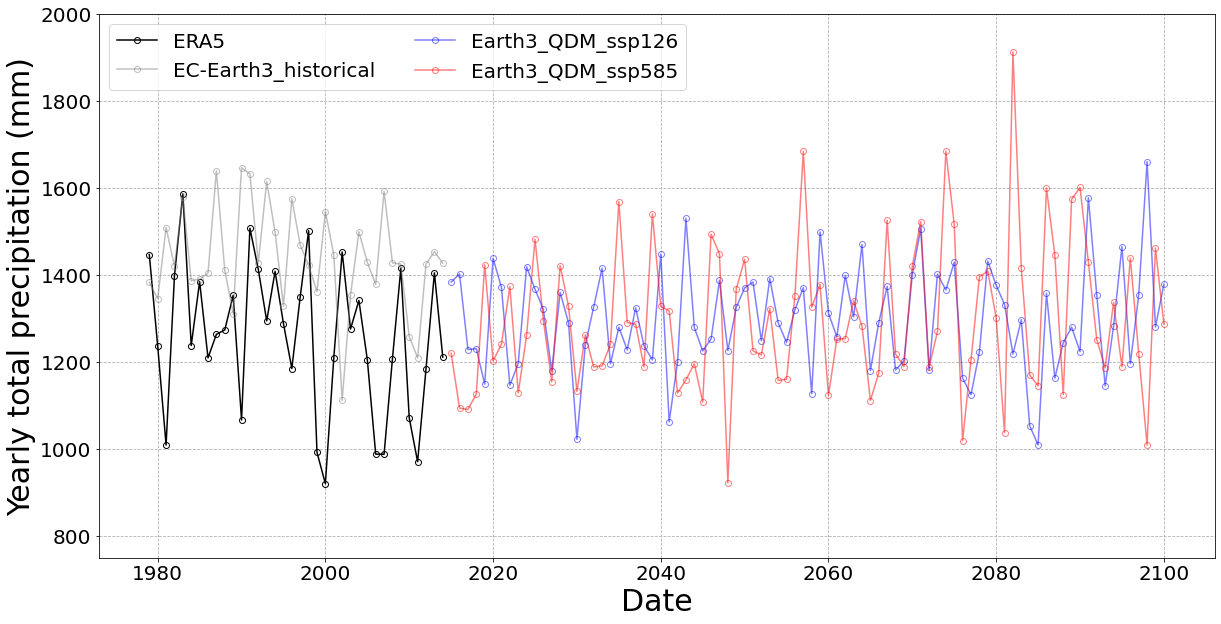

In [151]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names, Earth3_pr_hist_yearly_area_mean, color='grey', marker="o", mfc='none',label="EC-Earth3_historical", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="Earth3_QDM_ssp126", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="Earth3_QDM_ssp585", alpha=0.5)
#ax.plot(names, s4_daily_area_mean[1:366], color='purple', marker="o",mfc='none',label="Scenario4 (KGE=0.850)", alpha=0.5)
#ax.plot(names, s5_daily_area_mean[1:366], color='cyan',  marker="o",mfc='none',label="Scenario5 (KGE=0.958)", alpha=0.5)
#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(750, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

In [154]:
# load EC_Earth3 bilinear
Earth3_ssp126_pr_bilinear=xr.open_dataset('/glade/work/fangwang/CMIP6_bilinear/EC-Earth3/ssp126/pr_2015-2100_regrid_0.25.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp126_bilinear=Earth3_ssp126_pr_bilinear.pr[:,5:43,19:61]
Earth3_time_ssp126_bilinear=Earth3_ssp126_pr_bilinear.time
import pandas as pd
Earth3_date_ssp126_bilinear=pd.to_datetime(Earth3_time_ssp126_bilinear, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_pr_ssp126_bilinear_array=xr.DataArray(Earth3_pr_ssp126_bilinear.data, coords={'time': Earth3_pr_ssp126_bilinear.time, 'lat': Earth3_pr_ssp126_bilinear.lat,'lon': Earth3_pr_ssp126_bilinear.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp126_date_bilinear=Earth3_pr_ssp126_bilinear_array.assign_coords(time=Earth3_date_ssp126_bilinear)
Earth3_pr_ssp126_yearly_bilinear=Earth3_pr_ssp126_date_bilinear.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp126_yearly_area_mean_bilinear=np.mean(Earth3_pr_ssp126_yearly_bilinear.values, axis=(1,2))*86400

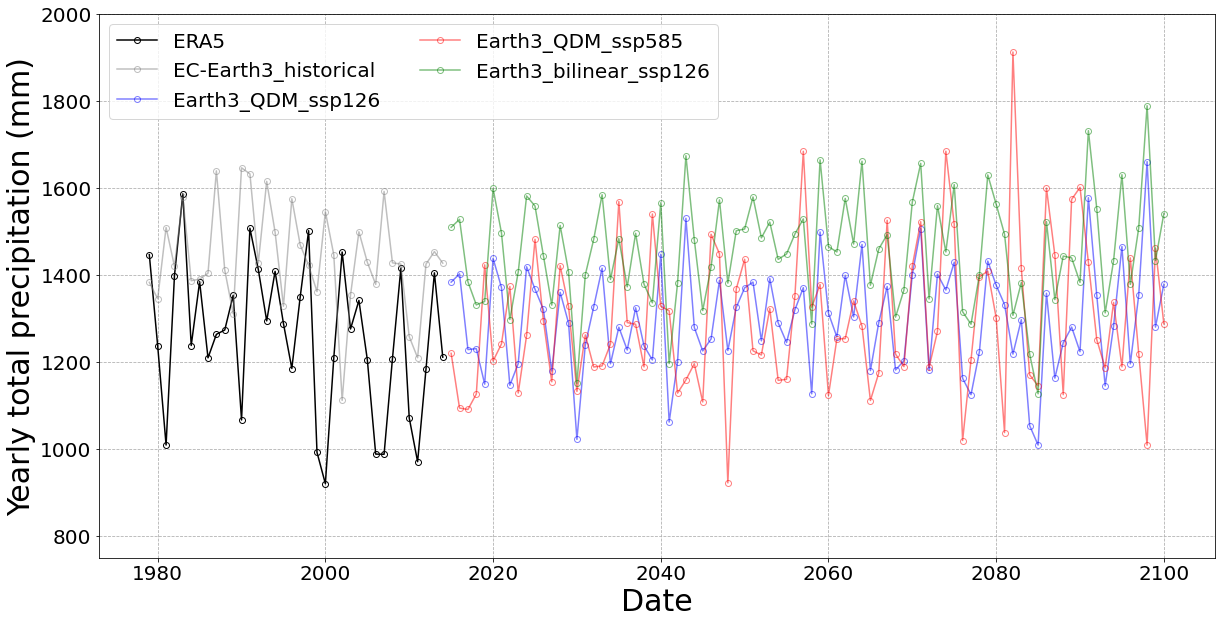

In [155]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names, Earth3_pr_hist_yearly_area_mean, color='grey', marker="o", mfc='none',label="EC-Earth3_historical", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="Earth3_QDM_ssp126", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="Earth3_QDM_ssp585", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean_bilinear, color='green', marker="o",mfc='none',label="Earth3_bilinear_ssp126", alpha=0.5)
#ax.plot(names, s5_daily_area_mean[1:366], color='cyan',  marker="o",mfc='none',label="Scenario5 (KGE=0.958)", alpha=0.5)
#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(750, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

In [156]:
# load EC_Earth3 bilinear
Earth3_ssp585_pr_bilinear=xr.open_dataset('/glade/work/fangwang/CMIP6_bilinear/EC-Earth3/ssp585/pr_2015-2100_regrid_0.25.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp585_bilinear=Earth3_ssp585_pr_bilinear.pr[:,5:43,19:61]
Earth3_time_ssp585_bilinear=Earth3_ssp585_pr_bilinear.time
import pandas as pd
Earth3_date_ssp585_bilinear=pd.to_datetime(Earth3_time_ssp585_bilinear, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_pr_ssp585_bilinear_array=xr.DataArray(Earth3_pr_ssp585_bilinear.data, coords={'time': Earth3_pr_ssp585_bilinear.time, 'lat': Earth3_pr_ssp585_bilinear.lat,'lon': Earth3_pr_ssp585_bilinear.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp585_date_bilinear=Earth3_pr_ssp585_bilinear_array.assign_coords(time=Earth3_date_ssp585_bilinear)
Earth3_pr_ssp585_yearly_bilinear=Earth3_pr_ssp585_date_bilinear.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp585_yearly_area_mean_bilinear=np.mean(Earth3_pr_ssp585_yearly_bilinear.values, axis=(1,2))*86400

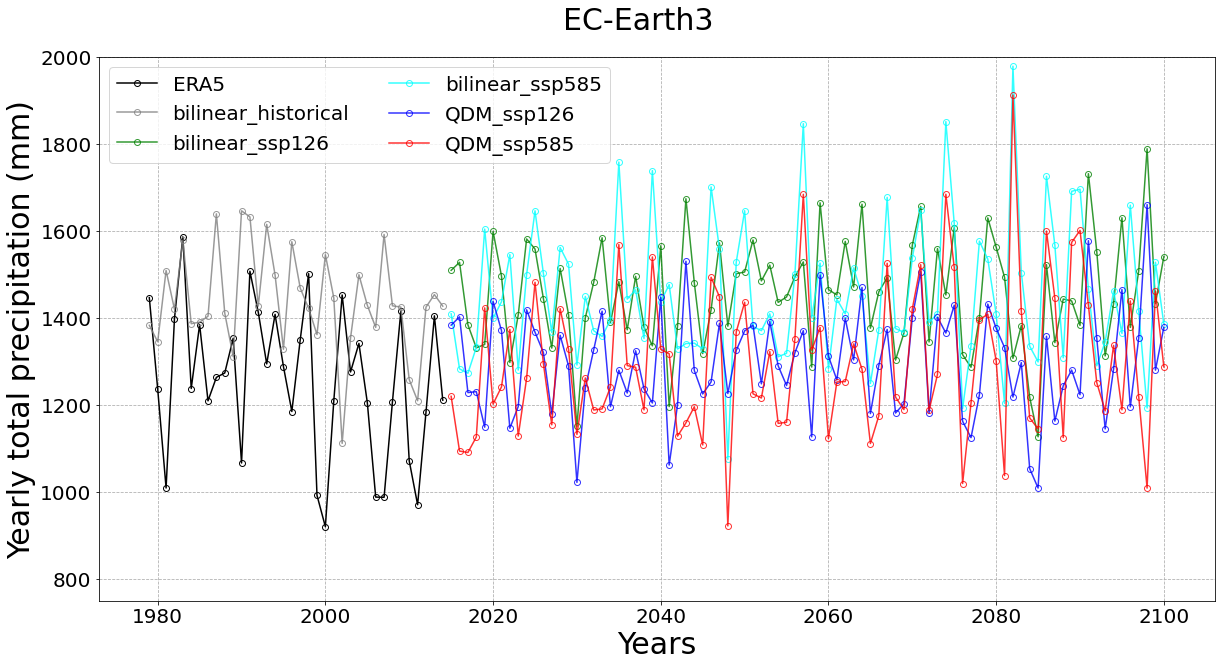

In [158]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('EC-Earth3', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names, Earth3_pr_hist_yearly_area_mean, color='grey', marker="o", mfc='none',label="bilinear_historical", alpha=0.8)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean_bilinear, color='green', marker="o",mfc='none',label="bilinear_ssp126", alpha=0.8)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean_bilinear, color='cyan',  marker="o",mfc='none',label="bilinear_ssp585", alpha=0.8)
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="QDM_ssp126", alpha=0.8)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="QDM_ssp585", alpha=0.8)

#ax.plot(names, s6_daily_area_mean[1:366], color='green', marker="o",mfc='none',label="Scenario6 (KGE=0.950)", alpha=0.5)
#ax.plot(names, base_daily_area_mean[1:366], color='orange', marker="o",mfc='none',label="QDM_BI    (KGE=0.756)", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Years', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(750, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

plt.savefig("/glade/work/fangwang/QDM/pr_QDM_EC-Earth3.jpg", bbox_inches='tight', dpi=300)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


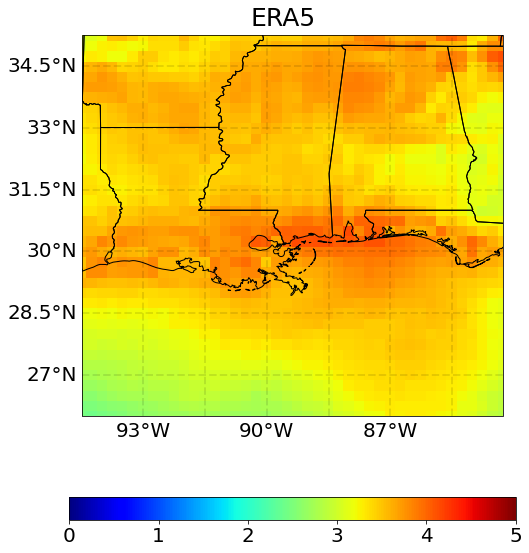

In [165]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('ERA5', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(hist_pr.tp[7305:,5:43,19:61]*1000, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

plt.savefig("/glade/work/fangwang/QDM/pr_ERA5_spatial.jpg", bbox_inches='tight', dpi=300)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


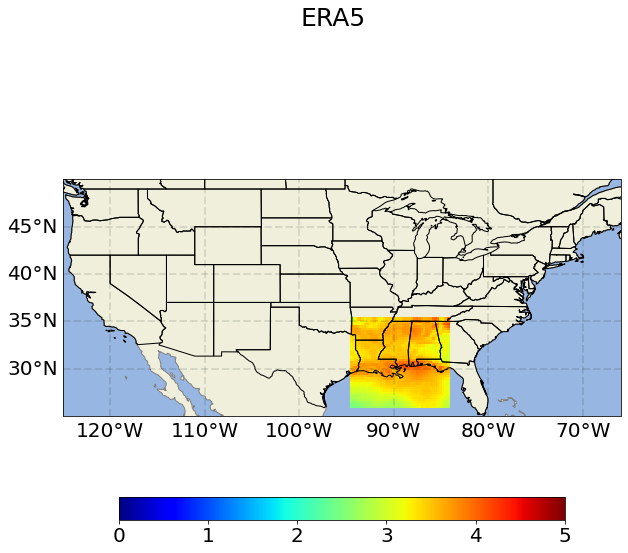

In [4]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('ERA5', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-125, -66, 25, 50], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(hist_pr.tp[7305:,5:43,19:61]*1000, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("/glade/work/fangwang/QDM/pr_ERA5_spatial.jpg", bbox_inches='tight', dpi=300)

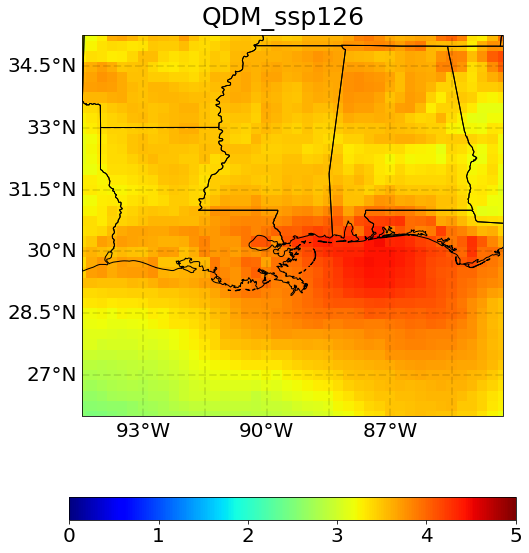

In [169]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp126', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp126.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

plt.savefig("/glade/work/fangwang/QDM/pr_QDM_ssp126_spatial.jpg", bbox_inches='tight', dpi=300)

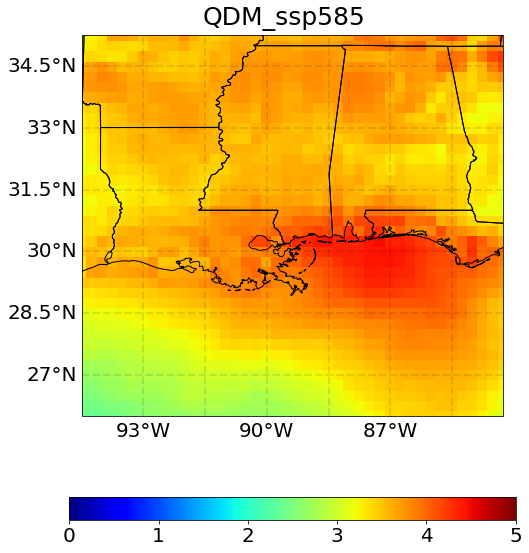

In [172]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp585', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp585.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

plt.savefig("/glade/work/fangwang/QDM/pr_QDM_ssp585_spatial.jpg", bbox_inches='tight', dpi=300)